In [24]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [69]:
df_train = pd.read_csv('train.csv', parse_dates=['date']).set_index('id')
df_test = pd.read_csv('test.csv', parse_dates=['date']).set_index('id')
df_stores = pd.read_csv('stores.csv')
df_transactions = pd.read_csv('transactions.csv') 
df_oil = pd.read_csv('oil.csv') 
df_holidays_events = pd.read_csv('holidays_events.csv') 

df_sample_submission = pd.read_csv('sample_submission.csv') 

df_train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


In [70]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 137.4+ MB


# 1: date

In [89]:
print('Minimum date: ' + str(df_train["date"].min().strftime('%m/%d/%Y')))
print('Maximum date: ' + str(df_train['date'].max().strftime('%m/%d/%Y')))

print('\nUnique values:')
df_train.groupby('date').count().value_counts()

Minimum date: 01/01/2013
Maximum date: 08/15/2017

Unique values:


store_nbr  family  sales  onpromotion
1782       1782    1782   1782           1684
dtype: int64

In [83]:
unique_analysis = pd.DataFrame({'Unique Dates': df_train['date'].unique()})
unique_analysis['Previous day diff'] = (unique_analysis['Unique Dates'] - unique_analysis['Unique Dates'].shift(1)).dt.days

print('Difference days between previous day:')
unique_analysis.head()

Difference days between previous day:


,Unique Dates,Previous day diff
0,2013-01-01,NaN
1,2013-01-02,1.0
2,2013-01-03,1.0
3,2013-01-04,1.0
4,2013-01-05,1.0


In [87]:
print('Analysis of date differences greater than 1')
unique_analysis[unique_analysis['Previous day diff'] > 1]

Analysis of date differences greater than 1


,Unique Dates,Previous day diff
358,2013-12-26,2.0
722,2014-12-26,2.0
1086,2015-12-26,2.0
1451,2016-12-26,2.0


# 2: store_nbr

In [41]:
print('Quantity of unique data: ' + str(df_train['store_nbr'].nunique()))
print('\nCount distribution:')
print('- Minimum count: ' + str(df_train['store_nbr'].value_counts().min()))
print('- Maximum count: ' + str(df_train['store_nbr'].value_counts().max()))

Quantity of unique data: 54

Count distribution:
- Minimum count: 55572
- Maximum count: 55572


In [44]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


# 3: family

In [48]:
print('Quantity of unique data: ' + str(df_train['family'].nunique()))
print('\nCount distribution:')
print('- Minimum count: ' + str(df_train['family'].value_counts().min()))
print('- Maximum count: ' + str(df_train['family'].value_counts().max()))

Quantity of unique data: 33

Count distribution:
- Minimum count: 90936
- Maximum count: 90936


# Notes

1. The range date of train's dataset starts in 2013 and ends in 08/15/2017 (4 years and 8 months of data)
2. There are 1782 values for each days consecutive, except 12/25 of all years
3. There are 54 different stores and each one contains 55572 registers in dataset
4. There are 33 different number of family product and each one contains 90936 registers in dataset
5. The last 3 notes shows that the data is balanced for these features (date, store_nbr and family)

# Sales

count    3000888.000
mean         357.776
std         1101.998
min            0.000
25%            0.000
50%           11.000
75%          195.847
max       124717.000
Name: sales, dtype: float64


<AxesSubplot: xlabel='sales', ylabel='Density'>

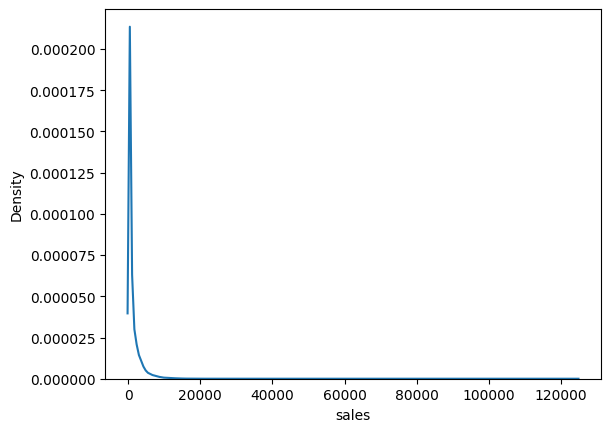

In [121]:
print(df_train['sales'].describe().round(3))
sns.kdeplot(data=df_train, x='sales')

C:\Windows\Temp\ipykernel_25024\3686514207.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year = df_train.groupby(pd.Grouper(key='date', freq='YS')).mean()
C:\Windows\Temp\ipykernel_25024\3686514207.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_month = df_train.groupby(pd.Grouper(key='date', freq='MS')).mean().reset_index()
C:\Windows\Temp\ipykernel_25024\3686514207.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for

TypeError: despine() got an unexpected keyword argument 'grid'

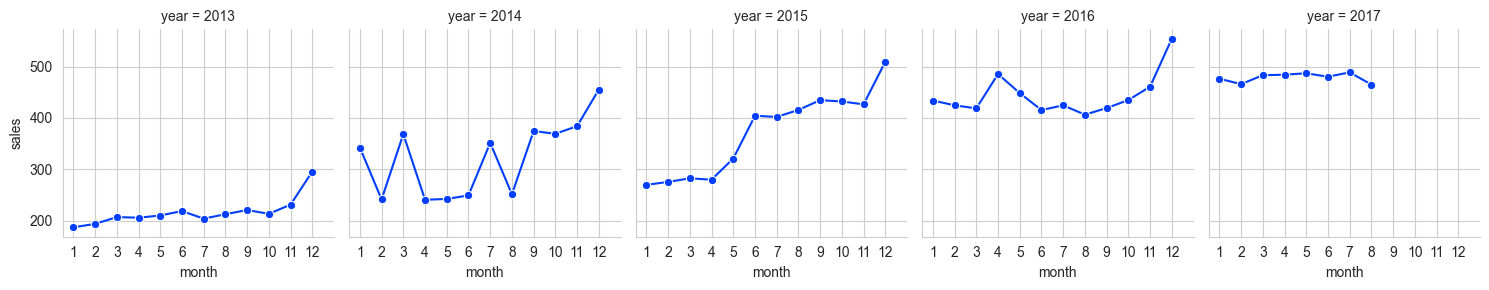

In [213]:


df_year = df_train.groupby(pd.Grouper(key='date', freq='YS')).mean()
df_month = df_train.groupby(pd.Grouper(key='date', freq='MS')).mean().reset_index()
df_month['year'] = df_month['date'].dt.year
df_month['month'] = df_month['date'].dt.month.astype(str)
df_day = df_train.groupby(pd.Grouper(key='date', freq='D')).mean()

g = sns.FacetGrid(df_month, col='year', margin_titles=True)
g.map(sns.lineplot, 'month', 'sales', markers=True, marker='o')
g.set(xlim=(-0.5,12))
# Personalizar gráfico

sns.set_style("whitegrid")
sns.set_palette("bright")
sns.despine(grid=False)

plt.show()


In [162]:
df_train.groupby(pd.Grouper(key='date', freq='MS')).mean().reset_index()

C:\Windows\Temp\ipykernel_25024\3332307973.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train.groupby(pd.Grouper(key='date', freq='MS')).mean().reset_index()


,date,store_nbr,sales,onpromotion
0,2013-01-01,27.5,186.952405,0.000000
1,2013-02-01,27.5,193.581846,0.000000
2,2013-03-01,27.5,206.880581,0.000000
3,2013-04-01,27.5,205.639071,0.000000
4,2013-05-01,27.5,209.943594,0.000000
5,2013-06-01,27.5,218.655893,0.000000
6,2013-07-01,27.5,203.783364,0.000000
7,2013-08-01,27.5,212.479434,0.000000
8,2013-09-01,27.5,220.593588,0.000000
9,2013-10-01,27.5,213.164266,0.000000


In [122]:
df_train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
